In [ ]:
%pip install python-docx
%pip install pywin32

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 8.5 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pywin32 (from versions: none)
ERROR: No matching distribution found for pywin32


In [2]:
!pip install PyPDF2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 15.1 MB/s eta 0:00:00


In [3]:
%pip install spacy

In [4]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
from PyPDF2 import PdfReader

def get_pdf_text(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PdfReader(pdf_file)
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

# Example usage:
document_text = get_pdf_text('/content/science class 8.pdf')


In [6]:
len(document_text)

454560

In [7]:
document_text

'SCIENCE\nTEXTBOOK  FOR CLASS VIIISCIENCE\n2018-19\nFirst Edition\nJanuary  2008  Magha 1929\nReprint Edition\nDecember 2008  Pausa 1930\nJanuary  2010  Magha 1931\nNovember 2010  Kartika 1932\nJanuary 2012  Magha 1933\nNovember 2012  Kartika 1934\nOctober 2013  Asvina 1935\nDecember 2014  Pausa 1936\nDecember 2015 Agrahayana 1937\nFebruary 2017 Magha 1938\nDecember 2017 Agrahayana 1939\nPD 75 0T+100T RPS\n© National Council of Educational\nResearch and Training, 2008\n` 55.00ISBN  978-81-7450-812-6\nALL RIGHTS RESERVED\n/boxshadowdwnNo part of this publication may be reproduced, stored in a retrieval\nsystem or transmitted, in any form or by any means, electronic,\nmechanical, photocopying, recording or otherwise without the prior\npermission of the publisher .\n/boxshadowdwnThis book is sold subject to the condition that it shall not, by way of\ntrade,  be lent,  re-sold, hired out or otherwise disposed of without the\npublisher’s consent, in any form of binding or cover other than t

In [8]:
import spacy
import pandas as pd

In [9]:
preprocess_text = document_text.lower()
import string

def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

preprocess_text = remove_punctuations(preprocess_text)
import re

def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

preprocess_text = remove_spl_chars(document_text)

In [10]:
len(preprocess_text)

439434

In [11]:
lines = document_text.split('. ')
lines = [line.strip() for line in lines if line.strip()]
df = pd.DataFrame(lines, columns=['Sentence'])

In [12]:
df

,Sentence
0,SCIENCE\nTEXTBOOK FOR CLASS VIIISCIENCE\n2018...
1,Dhankal Bus Stop\nPanihati\nKolkata 700 114 P...
2,Siraj Anwar\nDivision\nChief Editor :Shveta Up...
3,This principle marks a\ndeparture from the leg...
4,The syllabi and\ntextbooks developed on the ba...
...,...
3429,Visit a petrol pump in order to learn about th...
3430,Y ou may systematically r ecord your\nfinding...
3431,"The class can divide\nitself into two groups, ..."
3432,What are its objectives ? What is\nits calenda...


In [13]:
import re
import spacy

'''nlp = spacy.load('en_core_web_sm')
'''
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text


In [14]:
def count_words(text):
    return len(text.split())


In [15]:
df['Sentence'] = df['Sentence'].str.lower()
df['Sentence'] = df['Sentence'].apply(remove_punctuations)
df['Sentence'] = df['Sentence'].apply(remove_spl_chars)

In [16]:
df= df[df['Sentence'].apply(count_words) >= 4]

In [17]:
df

,Sentence
0,science textbook for class viiiscience 201819 ...
1,dhankal bus stop panihati kolkata 700 114 phon...
2,siraj anwar division chief editor shveta uppal...
3,this principle marks a departure from the lega...
4,the syllabi and textbooks developed on the bas...
...,...
3429,visit a petrol pump in order to learn about th...
3430,y ou may systematically r ecord your findings ...
3431,the class can divide itself into two groups wi...
3432,what are its objectives what is its calendar o...


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Sentence'])
num_clusters = 3 # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-19-072c70869e33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(X)


In [20]:
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    2616
2     371
0     227
Name: count, dtype: int64


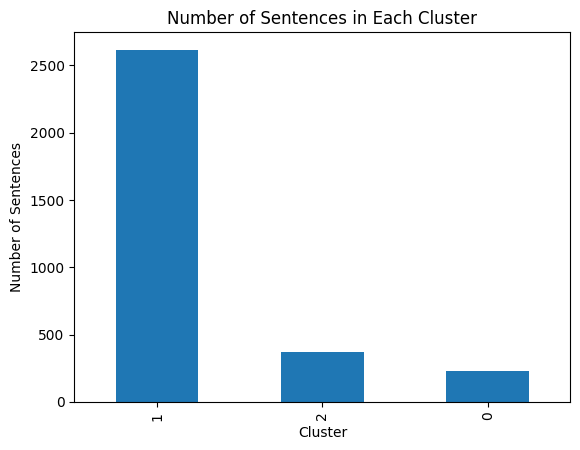

In [21]:
import matplotlib.pyplot as plt

cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Sentences')
plt.title('Number of Sentences in Each Cluster')
plt.show()

In [23]:
df_1 = df[df['Cluster'] == 1]  # Filter rows with Cluster 1
df_2 = df[df['Cluster'] == 2]  # Filter rows with Cluster 2
df_0 = df[df['Cluster'] == 0]

In [25]:
df_1

,Sentence,Cluster
0,science textbook for class viiiscience 201819 ...,1
1,dhankal bus stop panihati kolkata 700 114 phon...,1
2,siraj anwar division chief editor shveta uppal...,1
3,this principle marks a departure from the lega...,1
4,the syllabi and textbooks developed on the bas...,1
...,...,...
3429,visit a petrol pump in order to learn about th...,1
3430,y ou may systematically r ecord your findings ...,1
3431,the class can divide itself into two groups wi...,1
3432,what are its objectives what is its calendar o...,1


In [27]:
combined_paragraph_0 = ' '.join(df_0['Sentence'].tolist())
combined_paragraph_1 = ' '.join(df_1['Sentence'].tolist())
combined_paragraph_2 = ' '.join(df_2['Sentence'].tolist())

In [28]:
len(combined_paragraph_0)

51169

In [29]:
len(combined_paragraph_1)

352265

In [30]:
len(combined_paragraph_2)

31847

In [37]:
# Use a pipeline as a high-level helper
from transformers import pipeline
import torch
device = 0 if torch.cuda.is_available() else -1

pipe = pipeline("summarization", model="google/pegasus-xsum",device=device)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
def chunk_text(text, chunk_size=1000):
    # Split text into chunks of specified size
    for i in range(0, len(text), chunk_size):
        yield text[i:i + chunk_size]

# Set chunk size to something manageable
chunk_size = 1000  # Adjust as needed to fit model's token limits
chunks = list(chunk_text(combined_paragraph_1, chunk_size))

# Summarize each chunk
summaries = [pipe(chunk, max_length=50, min_length=30, do_sample=False)[0]['summary_text'] for chunk in chunks]


Your max_length is set to 90, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


In [50]:
len(combined_paragraph_1)

352265

In [51]:
len(summaries_1)

353

In [57]:
summaries_1 = summaries


In [52]:
summaryofcluster1 = ' '.join(summaries_1)
print(summaryofcluster1)

This book is copyrighted by the author and may not be reproduced in any form or by any means without the permission of the publisher boxshadowdwn. All prices are subject to change at least 24 hours before publication at the office of the secretary of the council of educational research and are subject to change at least 24 hours before publication at the office of the secretary of the council of educational research. In our series of letters from African journalists, film-maker and columnist Yousuf Raza Gilani looks at the changing face of education in Pakistan. This textbook has been designed with the aim of making children s life at school a happy experience rather than a source of stress or boredom syllabus designers have tried to address the following: The aim of this textbook is to provide a comprehensive and up-to-date understanding of child psychology to the students of primary and secondary schools. The national council of educational 30 2007 would like to take this opportunity

In [56]:
len(summaryofcluster1)

88511

In [58]:
chunk_size = 1000  # Adjust as needed to fit model's token limits
chunks = list(chunk_text(combined_paragraph_0, chunk_size))

# Summarize each chunk
summaries_0 = [pipe(chunk, max_length=50, min_length=30, do_sample=False)[0]['summary_text'] for chunk in chunks]

Your max_length is set to 90, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


In [59]:
summaryofcluster0 = ' '.join(summaries_0)
print(summaryofcluster0)

In our series of letters from African journalists, film-maker and columnist Farai Sevenzo looks at some of the most frequently asked questions about agriculture. A look at some of the key terms used in the farming industry in our series of letters from African journalists: - plough - weeding - harvesting - fertilisers - drip system - weeding - harvester circleright crops can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on In our series of letters from African journalists, we look at some of the words and phrases you may have missed in the past year or so. The following word puzzle with the help of 

In [60]:
chunk_size = 1000
chunks = list(chunk_text(combined_paragraph_2, chunk_size))

summaries_2 = [pipe(chunk, max_length=50, min_length=30, do_sample=False)[0]['summary_text'] for chunk in chunks]

In [61]:
summaryofcluster2 = ' '.join(summaries_2)
print(summaryofcluster2)

In our series of letters from African journalists we look at some of the ways in which fig has been used in the past and how it is being used today. In our series of letters from African journalists we take a look at some of the more unusual ways in which people in our country live and work. In our series of letters from Indian journalists, film-maker and columnist Sharmila Tagore looks at some of the lesser known facts about the country. In this series of letters from British journalists we look at some of the more unusual uses for some of the materials we use in our daily lives. The following are some of the key facts about petroleum and coal that you may want to consider when looking at their use in the 21st Century: Can you name some more substances which ar e combustible y ou can add to table 61 let us investigate conditions under which combustion takes place combustion and flame 65chimney fig now put a glass plate over the chimney fig 62c from the grass In our series of letters f

In [62]:
combined_summary = f"{summaryofcluster0} {summaryofcluster1} {summaryofcluster2}"

print(combined_summary)

In our series of letters from African journalists, film-maker and columnist Farai Sevenzo looks at some of the most frequently asked questions about agriculture. A look at some of the key terms used in the farming industry in our series of letters from African journalists: - plough - weeding - harvesting - fertilisers - drip system - weeding - harvester circleright crops can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on seasons rabi and kharif crops circleright weeds can be broadly categorised into two types based on In our series of letters from African journalists, we look at some of the words and phrases you may have missed in the past year or so. The following word puzzle with the help of 

In [63]:
len(combined_summary)

107218

In [64]:
chunk_size = 1000
chunks = list(chunk_text(combined_summary, chunk_size))

final_summaries = [pipe(chunk, max_length=50, min_length=30, do_sample=False)[0]['summary_text'] for chunk in chunks]

Your max_length is set to 50, but your input_length is only 44. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


In [65]:
summaryfinal = ' '.join(final_summaries)
print(summaryfinal)

In our series of letters from African journalists, film-maker and columnist Farai Sevenzo looks at some of the most frequently asked questions about agriculture. In our series of letters from British students we look at some of the facts and figures behind some of the most common questions asked in their classes. In class we have been looking at the different types of synthetic fibres and plastics and here is a list of things made of synthetic fibres and plastics and here is a list of things made of synthetic fibres and plastics In our series of letters from African journalists, novelist and writer Adaobi Tricia Nwaubani looks at some of the issues surrounding plastic waste. In this chapter we will learn about some exhaustible natural resources like coal petroleum and natural gas these were formed from the dead remains of living organisms fossils so these were all known as fossil fuels A glossary of the terms used in the oil and gas industry, as well as a look at some of the more obscu

In [66]:
len(summaryfinal)

19255

In [67]:
len(document_text)

454560